<a href="https://colab.research.google.com/github/Henryakhag/Henryakhag/blob/main/Linear_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Functions that Build and Train Model

In [9]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature,y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")


Defined build_model and train_model


Plotting Functions

In [10]:

def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Define Dataset

In [11]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Hyperparameters

Epoch 1/10
1/1 [==============================] - 0s 302ms/step - loss: 1156.5225 - root_mean_squared_error: 34.0077
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 1138.8458 - root_mean_squared_error: 33.7468
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 1126.1537 - root_mean_squared_error: 33.5582
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 1115.6041 - root_mean_squared_error: 33.4007
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 1106.2965 - root_mean_squared_error: 33.2610
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 1097.8126 - root_mean_squared_error: 33.1333
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 1089.9203 - root_mean_squared_error: 33.0139
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 1082.4745 - root_mean_squared_error: 32.9010
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


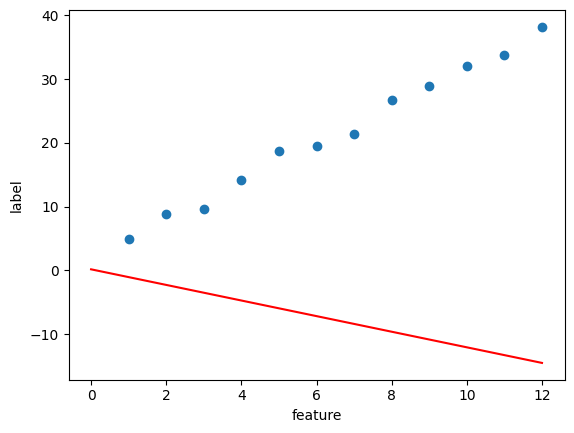

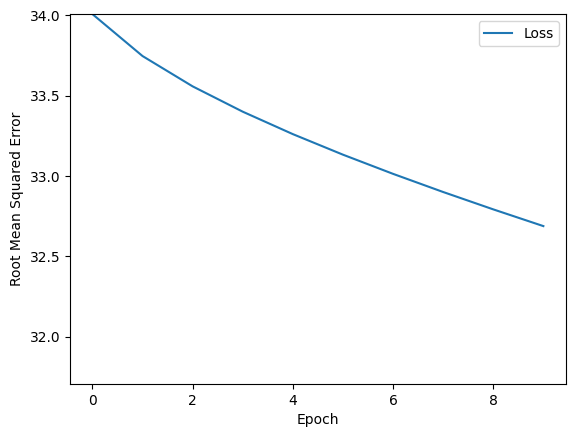

In [14]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Increase the number of Epocs

Epoch 1/450
1/1 [==============================] - 0s 326ms/step - loss: 303.2186 - root_mean_squared_error: 17.4132
Epoch 2/450
1/1 [==============================] - 0s 12ms/step - loss: 294.2072 - root_mean_squared_error: 17.1525
Epoch 3/450
1/1 [==============================] - 0s 13ms/step - loss: 287.8011 - root_mean_squared_error: 16.9647
Epoch 4/450
1/1 [==============================] - 0s 12ms/step - loss: 282.5147 - root_mean_squared_error: 16.8082
Epoch 5/450
1/1 [==============================] - 0s 13ms/step - loss: 277.8784 - root_mean_squared_error: 16.6697
Epoch 6/450
1/1 [==============================] - 0s 15ms/step - loss: 273.6750 - root_mean_squared_error: 16.5431
Epoch 7/450
1/1 [==============================] - 0s 11ms/step - loss: 269.7835 - root_mean_squared_error: 16.4251
Epoch 8/450
1/1 [==============================] - 0s 19ms/step - loss: 266.1289 - root_mean_squared_error: 16.3135
Epoch 9/450
1/1 [==============================] - 0s 15ms/step - loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


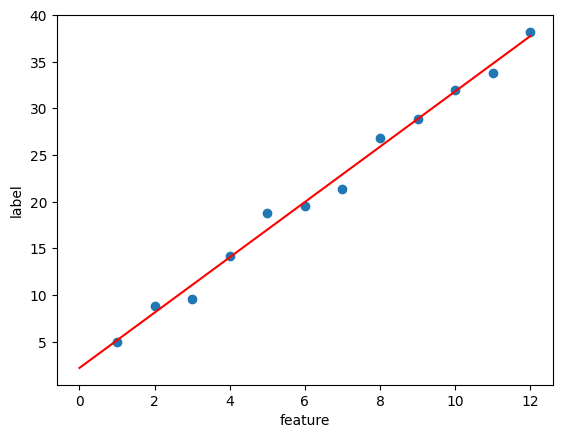

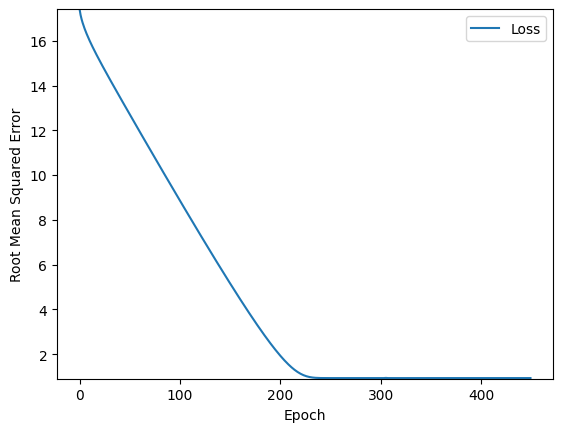

In [15]:
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Increase Learning Rate

Epoch 1/500
1/1 [==============================] - 0s 300ms/step - loss: 127.7979 - root_mean_squared_error: 11.3048
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 6758000.0000 - root_mean_squared_error: 2599.6152
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 127.3061 - root_mean_squared_error: 11.2830
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 1.4484 - root_mean_squared_error: 1.2035
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0120 - root_mean_squared_error: 1.0060
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 0.9984 - root_mean_squared_error: 0.9992
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9903 - root_mean_squared_error: 0.9952
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9826 - root_mean_squared_error: 0.9913
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 0.9750 -

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


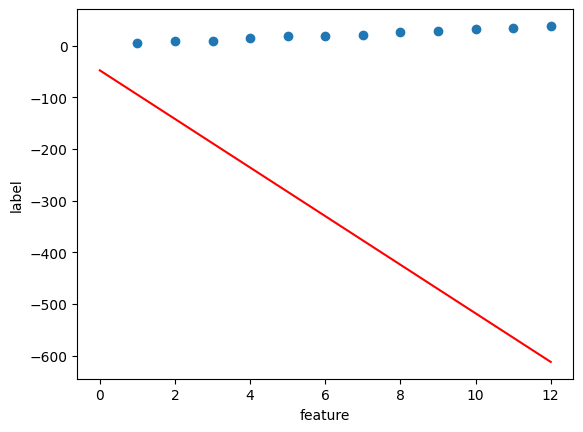

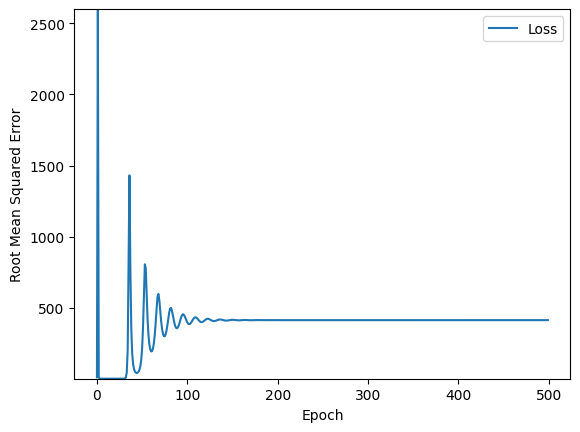

In [16]:
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Ideal Combination of learning Rate and Number of Epoc

Epoch 1/70
1/1 [==============================] - 0s 318ms/step - loss: 128.2995 - root_mean_squared_error: 11.3269
Epoch 2/70
1/1 [==============================] - 0s 13ms/step - loss: 59.1854 - root_mean_squared_error: 7.6932
Epoch 3/70
1/1 [==============================] - 0s 13ms/step - loss: 31.3301 - root_mean_squared_error: 5.5973
Epoch 4/70
1/1 [==============================] - 0s 12ms/step - loss: 17.2524 - root_mean_squared_error: 4.1536
Epoch 5/70
1/1 [==============================] - 0s 12ms/step - loss: 9.6721 - root_mean_squared_error: 3.1100
Epoch 6/70
1/1 [==============================] - 0s 15ms/step - loss: 5.5374 - root_mean_squared_error: 2.3532
Epoch 7/70
1/1 [==============================] - 0s 13ms/step - loss: 3.3068 - root_mean_squared_error: 1.8185
Epoch 8/70
1/1 [==============================] - 0s 14ms/step - loss: 2.1329 - root_mean_squared_error: 1.4604
Epoch 9/70
1/1 [==============================] - 0s 14ms/step - loss: 1.5357 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


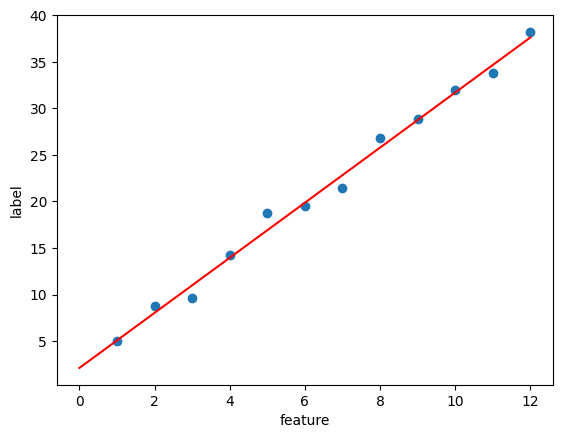

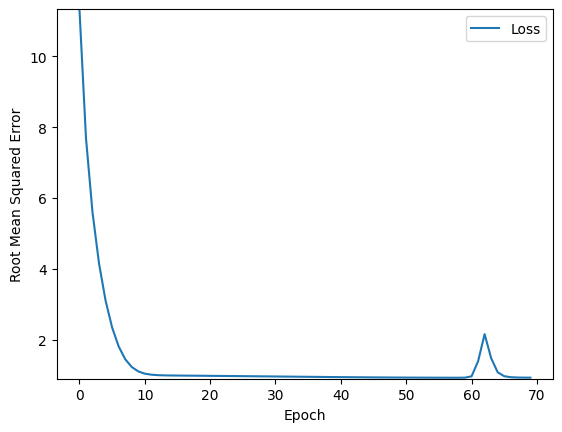

In [17]:
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Adjust Batch Size

Epoch 1/125
12/12 [==============================] - 0s 2ms/step - loss: 1015.5364 - root_mean_squared_error: 31.8675
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 752.6505 - root_mean_squared_error: 27.4345
Epoch 3/125
12/12 [==============================] - 0s 2ms/step - loss: 555.3459 - root_mean_squared_error: 23.5658
Epoch 4/125
12/12 [==============================] - 0s 2ms/step - loss: 400.5428 - root_mean_squared_error: 20.0136
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 283.2473 - root_mean_squared_error: 16.8300
Epoch 6/125
12/12 [==============================] - 0s 2ms/step - loss: 185.5714 - root_mean_squared_error: 13.6225
Epoch 7/125
12/12 [==============================] - 0s 2ms/step - loss: 109.1539 - root_mean_squared_error: 10.4477
Epoch 8/125
12/12 [==============================] - 0s 2ms/step - loss: 57.8246 - root_mean_squared_error: 7.6043
Epoch 9/125
12/12 [==============================] - 0s 2ms/step 

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


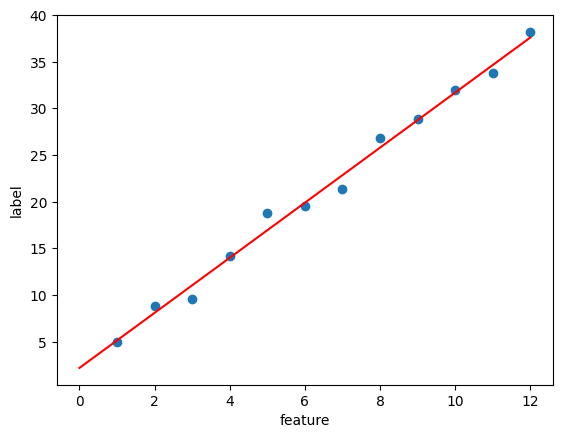

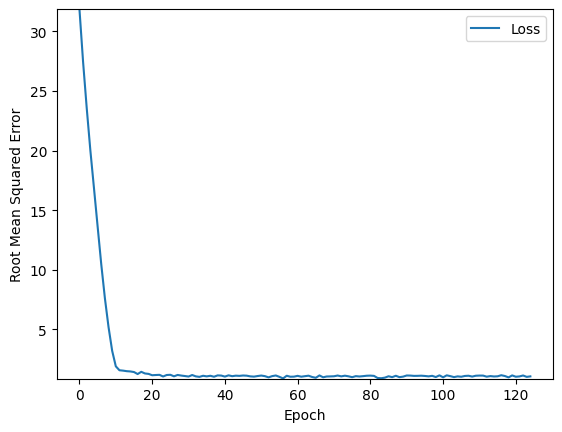

In [18]:
learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
